In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns

In [2]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import STOPWORDS
import nltk
from konlpy.tag import Twitter
t = Twitter()

In [3]:
# 네이버 웹툰 리뷰가 저장된 파일을 읽는다.
review = open('./review.txt', encoding='utf-8').read()
review

'마루가 사는 쪽이 ㅂㄱ천인지 똑같네요! 작가님께 마루는 순수한 사랑 그 자체인가봅니다. 저는 사실 동물을 무서워해서 가끔산책하다보면 불편할때가 종종 있었는데 앞으로는 우리동네에 마루가 있다고 생각하며 예쁘게 볼수있을것같습니다😊😊 \n아 너무 귀엽당....\n임주스씨 주스 얼어서 슬러쉬 되겠어요\n서율이 정수리 너무귀여워ㅋㅋㅋㅋ 앞으로넘어지고 우는거 참는것도 귀여워 빨아먹어 호로록\n엉엉 검은고양이 내가 키울래 흑흑\n탄아 너무 귀엽다..ㅠㅠ\n치즈고양이 tnr 때문에 귀 한쪽 짤린거 디테일봐..\n저러고 선물 막 소박하게 개껌 막 이러는거 아님? ㅎㅎㅎㅎㅎㅎㅎ\n사랑해 마루툰 ㅠㅠ\n나너무행복해... \n아 진짜 힐링툰이다..💕\n치즈고양이 양말냄새 맡고ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ\n여기 별점 10점말고 100000점은 못주나요..ㅠ\n아무도 궁금해하지 않겠지만..치즈냥이가 양말 냄새를 맡고 ㅇ0ㅇ하는 표정을 짓는 부분이 있는데 실제로 고양이들이 냄새를 맡다가 저렇게 충격을 받은듯 입을 벌리고 멍한 표정을 지을때가 있습니다. 플레멘 반응이라고 하는데요, 악취에 경악하는 것이 아니고 보습 코 기관에 공기를 보내 냄새 물질을 검사할때 짓는 표정입니다. 고양이 외에도 고양잇과 동물인 사자, 호랑이 혹은 말이나 사슴도 이런 반응을 보이곤 한답니다ㅎㅎ 냥이들 충격받은듯한 얼굴이 사람이 보기엔 너모 귀엽죠ㅎㅎ\n어..내 맘이 구름이 되고 있어...\n어느 웹툰이든 보기만 했지 댓글을 남기는 건 처음이에요. 2년 전 무지개 다리를 건너 천국에 있는 반려견 이라 적는 것도 미안한 내 가족, 내 동생이 마루처럼 말할 수 있었다면 그 아이가 느끼는 세세한 감정도 모두 공감해 줄 수 있었을 텐데 하는 막연한 아쉬움이 들지만 동시에 마루를 보고 있으면 그냥 행복해져요. 조건 없는 내리 사랑의 표본인 강아지들의 순수함은 다 똑같아서 그런가 봐요 :) 이 만화를 그려주시는 작가님을 늘 응원합니다 :-)* 새해 복 많이 받으세요!\n마루 강쥐 사실 끝이 뭔가 꿈이다 이러고 안 끝났으면 좋겠

In [4]:
# 한글 형태소 분석을 실행한다.
review_tokens = t.nouns(review)
review_tokens

['마루',
 '쪽',
 '천인',
 '작가',
 '마루',
 '사랑',
 '그',
 '자체',
 '저',
 '사실',
 '동물',
 '가끔',
 '산책',
 '때',
 '종종',
 '앞',
 '우리동네',
 '마루',
 '생각',
 '임',
 '주스',
 '주스',
 '슬러쉬',
 '율',
 '정수리',
 '앞',
 '빨',
 '엉엉',
 '고양이',
 '내',
 '치즈',
 '고양이',
 '때문',
 '귀',
 '한쪽',
 '짤린거',
 '디테일',
 '선물',
 '막',
 '개껌',
 '막',
 '사랑',
 '마루',
 '툰',
 '나',
 '진짜',
 '힐링툰',
 '치즈',
 '고양이',
 '양말',
 '냄새',
 '여기',
 '점',
 '점',
 '점',
 '아무',
 '치즈',
 '이',
 '양말',
 '냄새',
 '표정',
 '부분',
 '실제',
 '고양이',
 '냄새',
 '충격',
 '입',
 '표정',
 '때',
 '플레멘',
 '반응',
 '악취',
 '경악',
 '것',
 '보습',
 '코',
 '기관',
 '공기',
 '냄새',
 '물질',
 '검사',
 '때',
 '표정',
 '고양이',
 '외',
 '고양',
 '동물',
 '사자',
 '호랑이',
 '말',
 '사슴',
 '반응',
 '냥',
 '충격',
 '얼굴',
 '사람',
 '보기',
 '모',
 '내',
 '맘',
 '구름',
 '웹툰',
 '보기',
 '댓글',
 '건',
 '처음',
 '전',
 '무지개',
 '다리',
 '건너',
 '천국',
 '반려견',
 '것',
 '내',
 '가족',
 '내',
 '동생',
 '마루',
 '말',
 '수',
 '그',
 '아이',
 '감정',
 '모두',
 '공감',
 '줄',
 '수',
 '아쉬움',
 '동시',
 '마루',
 '보고',
 '그냥',
 '조건',
 '사랑',
 '표본',
 '강아지',
 '런가',
 '이',
 '만화',
 '작가',
 '늘',
 '응원',
 '새해',
 '복',
 '마루',
 '강쥐',
 '사

In [5]:
# 불용어를 정의한다.
stop_words = ['자체', '가끔', '종종', '엉엉', '짤린거', '때문', '진짜', '한쪽', '아무', '부분', '실제']
review_tokens = [each_word for each_word in review_tokens if each_word not in stop_words and len(each_word) > 1]
review_tokens

['마루',
 '천인',
 '작가',
 '마루',
 '사랑',
 '사실',
 '동물',
 '산책',
 '우리동네',
 '마루',
 '생각',
 '주스',
 '주스',
 '슬러쉬',
 '정수리',
 '고양이',
 '치즈',
 '고양이',
 '디테일',
 '선물',
 '개껌',
 '사랑',
 '마루',
 '힐링툰',
 '치즈',
 '고양이',
 '양말',
 '냄새',
 '여기',
 '치즈',
 '양말',
 '냄새',
 '표정',
 '고양이',
 '냄새',
 '충격',
 '표정',
 '플레멘',
 '반응',
 '악취',
 '경악',
 '보습',
 '기관',
 '공기',
 '냄새',
 '물질',
 '검사',
 '표정',
 '고양이',
 '고양',
 '동물',
 '사자',
 '호랑이',
 '사슴',
 '반응',
 '충격',
 '얼굴',
 '사람',
 '보기',
 '구름',
 '웹툰',
 '보기',
 '댓글',
 '처음',
 '무지개',
 '다리',
 '건너',
 '천국',
 '반려견',
 '가족',
 '동생',
 '마루',
 '아이',
 '감정',
 '모두',
 '공감',
 '아쉬움',
 '동시',
 '마루',
 '보고',
 '그냥',
 '조건',
 '사랑',
 '표본',
 '강아지',
 '런가',
 '만화',
 '작가',
 '응원',
 '새해',
 '마루',
 '강쥐',
 '사실',
 '뭔가',
 '생일',
 '축하',
 '마루',
 '멋졍',
 '마루',
 '머릿속',
 '대사',
 '마루',
 '커버',
 '거지',
 '우리',
 '마루',
 '언니',
 '사고',
 '고양이',
 '담장',
 '꼬리',
 '길고양이',
 '나부',
 '길고양이',
 '모두',
 '치즈',
 '고양이',
 '귀가',
 '이번',
 '거의',
 '짱구',
 '마루',
 '크리스마스',
 '최고',
 '힐링',
 '웹툰',
 '먀옥먀먀먀마옹',
 '작가',
 '불광천',
 '배경',
 '하씨',
 '이번',
 '역대',
 '학교',
 '콧구멍',
 '벌렁',
 '거리',
 '면서',


In [6]:
# 워드클라우드로 구현할 단어들의 출현 빈도수를 센다.
token = nltk.Text(review_tokens)
token.vocab().most_common(50)

[('마루', 396),
 ('고양이', 143),
 ('치즈', 93),
 ('힐링', 73),
 ('중성', 68),
 ('작가', 48),
 ('웹툰', 46),
 ('우리', 46),
 ('선물', 44),
 ('생일', 37),
 ('사랑', 35),
 ('주스', 32),
 ('냄새', 31),
 ('축하', 31),
 ('머리', 28),
 ('강아지풀', 28),
 ('마음', 27),
 ('오늘', 26),
 ('크리스마스', 25),
 ('표정', 23),
 ('언니', 22),
 ('제발', 22),
 ('이모티콘', 22),
 ('디테일', 20),
 ('양말', 20),
 ('꼬리', 20),
 ('이번', 20),
 ('귀가', 18),
 ('벼락치기', 18),
 ('생각', 17),
 ('눈물', 17),
 ('보고', 16),
 ('길고양이', 16),
 ('최고', 16),
 ('애기', 16),
 ('기여', 14),
 ('아기', 14),
 ('만화', 13),
 ('얼굴', 12),
 ('사람', 12),
 ('연재', 12),
 ('정말', 12),
 ('강쥐', 11),
 ('수술', 11),
 ('빨래', 11),
 ('표시', 11),
 ('길냥이', 11),
 ('강아지', 10),
 ('동화', 10),
 ('산타', 10)]

In [7]:
# 워드클라우드로 구현할 단어를 뽑아내서 단어를 key로 하고 출현 빈도수를 value로 하는 딕셔너리를 만든다.
data = dict(token.vocab().most_common(250))
data

{'마루': 396,
 '고양이': 143,
 '치즈': 93,
 '힐링': 73,
 '중성': 68,
 '작가': 48,
 '웹툰': 46,
 '우리': 46,
 '선물': 44,
 '생일': 37,
 '사랑': 35,
 '주스': 32,
 '냄새': 31,
 '축하': 31,
 '머리': 28,
 '강아지풀': 28,
 '마음': 27,
 '오늘': 26,
 '크리스마스': 25,
 '표정': 23,
 '언니': 22,
 '제발': 22,
 '이모티콘': 22,
 '디테일': 20,
 '양말': 20,
 '꼬리': 20,
 '이번': 20,
 '귀가': 18,
 '벼락치기': 18,
 '생각': 17,
 '눈물': 17,
 '보고': 16,
 '길고양이': 16,
 '최고': 16,
 '애기': 16,
 '기여': 14,
 '아기': 14,
 '만화': 13,
 '얼굴': 12,
 '사람': 12,
 '연재': 12,
 '정말': 12,
 '강쥐': 11,
 '수술': 11,
 '빨래': 11,
 '표시': 11,
 '길냥이': 11,
 '강아지': 10,
 '동화': 10,
 '산타': 10,
 '표현': 10,
 '살짝': 9,
 '장면': 9,
 '산타할아버지': 9,
 '감동': 9,
 '친구': 9,
 '충격': 8,
 '완전': 8,
 '건가': 8,
 '바로': 8,
 '기엽다': 8,
 '현실': 8,
 '연말': 8,
 '사실': 7,
 '동생': 7,
 '그냥': 7,
 '평생': 7,
 '집사': 7,
 '웃기': 7,
 '무슨': 7,
 '포인트': 7,
 '어린이': 7,
 '이제': 7,
 '조금': 7,
 '동물': 6,
 '역대': 6,
 '혹시': 6,
 '이야기': 6,
 '애니': 6,
 '엄마': 6,
 '너희': 6,
 '쿠키': 6,
 '아가': 6,
 '처음': 5,
 '아이': 5,
 '침대': 5,
 '졸귀': 5,
 '원래': 5,
 '다시': 5,
 '언제': 5,
 '계속': 5,
 '느낌': 5,
 '와중

In [8]:
# 워드클라우드 마스크 이미지
mask = np.array(Image.open('./mask.png'))

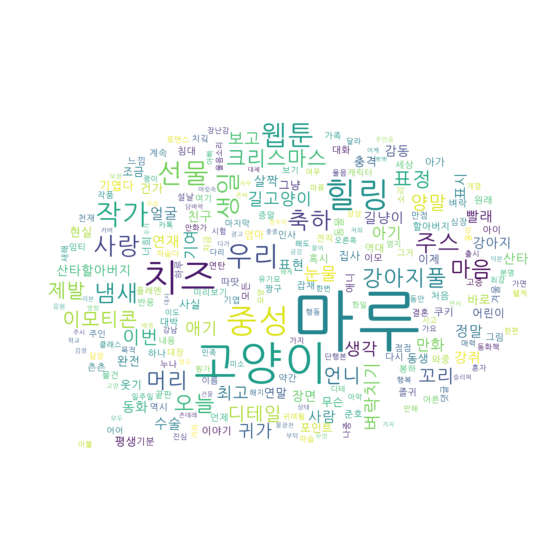

In [9]:
# 딕셔너리에 저장된 데이터는 generate_from_frequencies() 함수를 사용해서 워드클라우드를 만든다.
wordcloud = WordCloud(
    font_path='C:\\WINDOWS\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    max_font_size=250,
    max_words=250,
    mask=mask
).generate_from_frequencies(data)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()